## Merging the NBA datasets

Reading in the three data frames

In [ ]:
import pandas as pd
champs=pd.read_pickle("https://github.com/Policy-by-the-Numbers/spacejam/raw/main/nbachamps.pkl")
streak=pd.read_pickle("https://github.com/Policy-by-the-Numbers/spacejam/raw/main/nbawinstreaks.pkl")
mvp=pd.read_pickle("https://github.com/Policy-by-the-Numbers/spacejam/raw/main/nba_mvps.pkl")
regseason=pd.read_pickle("https://github.com/Policy-by-the-Numbers/spacejam/raw/main/regseason.pkl")

In [ ]:
champs.info()

In [ ]:
streak.info()

Realizing that the unit of analysis for win streak is not by team. Gonna move on with just the MVP data to see what happens.

In [ ]:
champs.shape,streak.shape,mvp.shape

Looking first at championship data vs. MVP data

In [ ]:
onlyChamps=set(champs.Team)-set(mvp.Team)
onlyChamps

In [ ]:
onlyMVP=set(mvp.Team)-set(champs.Team)
onlyMVP

Here we'll try and find what countries in onlyChamps may match those in onlyMVP using fuzzy merge

In [ ]:
!pip install thefuzz
from thefuzz import process as fz

# look for a country in onlyMVP and return the most similar
[(fz.extractOne(champs, onlyMVP),champs) for champs in sorted(onlyChamps)]

In [ ]:
[(fz.extractOne(champs, onlyMVP),champs)
 for champs in sorted(onlyChamps)
if fz.extractOne(champs, onlyMVP)[1]>80]

I like these matches, so I'll create a dictionary:

In [ ]:
changesMVP1={fz.extractOne(champs, onlyMVP)[0]:champs
            for champs in sorted(onlyChamps)
            if fz.extractOne(champs, onlyMVP)[1]>80}
              
# dictionary of matches
changesMVP1

In [ ]:
mvp.Team.replace(to_replace=changesMVP1,inplace=True)
mvp.Team

In [ ]:
# second try
onlyChamps=set(champs.Team)-set(mvp.Team)
onlyMVP=set(mvp.Team)-set(champs.Team)
[(fz.extractOne(champs, onlyMVP),champs) for champs in sorted(onlyChamps)]

The remaining teams are ones that are no longer existent and therefore are likely not in the list of MVPs by team. Let's retry the merge.

In [ ]:
champs.merge(mvp).shape #much better matching

In [ ]:
champs_mvp=champs.merge(mvp)
champs_mvp.info()

## Here I'm going to try and merge the regular season data

,Win,Loss,Apps,Pct,Awards
count,24.000000,24.000000,24.000000,24.000000,30.000000
mean,3.125000,3.083333,6.208333,0.424250,2.233333
std,4.665437,3.091597,7.113852,0.328651,2.528231
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,2.000000,0.237500,0.250000
50%,1.000000,2.500000,4.000000,0.381000,1.500000
75%,3.000000,4.000000,6.250000,0.604000,3.000000
max,17.000000,15.000000,32.000000,1.000000,10.000000


<AxesSubplot:>

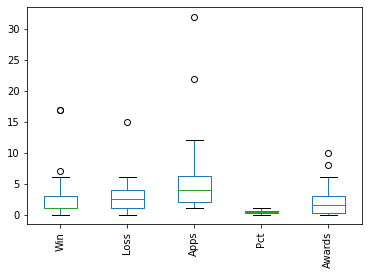

In [90]:
champs_mvp.plot(kind='box', rot=90)

Let's pay attention to highest and lowest values

In [93]:
!pip install sklearn
from sklearn import preprocessing

# prepare the process
scaler = preprocessing.MinMaxScaler(feature_range=(0, 10))

# apply process
arrayTotal = scaler.fit_transform(champs_mvp[['Total']])

# result
arrayTotal

ModuleNotFoundError: No module named 'sklearn'

## Exporting merged dataset

For future use in Python:

In [97]:
champs_mvp.to_pickle("champs_mvp.pkl")
# you will need: DF=pd.read_pickle("champs_mvp.pkl")
# or:
# from urllib.request import urlopen
# DF=pd.read_pickle(urlopen("https://..../champs_mvp.pkl"),compression=None)

For future use in R:

In [99]:
#try the following before starting Python:
#export LD_LIBRARY_PATH="$(python -m rpy2.situation LD_LIBRARY_PATH)":${LD_LIBRARY_PATH}

!pip install rpy2.robjects
from rpy2.robjects import pandas2ri
pandas2ri.activate()

from rpy2.robjects.packages import importr

base = importr('base')
base.saveRDS(champs_mvp,file="champs_mvp.RDS")


#In R, you call it with: DF = readRDS("demo_fragile.RDS")
#or, if iyou read from cloud: DF = readRDS(url("https://..../demo_fragile.RDS")

ERROR: Could not find a version that satisfies the requirement rpy2.robjects (from versions: none)
ERROR: No matching distribution found for rpy2.robjects


ModuleNotFoundError: No module named 'rpy2'

In [ ]:
Gonna save as a csv also just cause:

In [100]:
champs_mvp.to_csv("champs_mvp.csv")